In [1]:
%run ../scripts/notebook_settings_lean.py
from scipy import stats
from horizonplot import horizonplot
from chromwindow import window
import zarr
import allel

In [2]:
def admixture_calc(starting_aut, starting_x,
                   gen_admix, admix_prop, male_bias, pop_svamp):
    admixing_aut, admixing_x = starting_aut, starting_x
    auto_perc_his, x_perc_his, gen_his, pop_his = [], [], [], []
    for j in range(pop_svamp):
        auto_perc, x_perc = 1, 1
        for i in range(gen_admix):
            auto_perc_his.append(auto_perc), x_perc_his.append(x_perc), gen_his.append(i), pop_his.append(j+1)
            auto_perc = auto_perc*(1-admix_prop*admixing_aut)
            x_perc = x_perc*(1-admix_prop*admixing_x*(male_bias*2/3+(1-male_bias)*4/3))
        print(auto_perc, x_perc, x_perc/auto_perc)
        admixing_aut, admixing_x = 1-auto_perc, 1-x_perc
    return pd.DataFrame({"generations": gen_his, "autosomal admixture": auto_perc_his,
                         "chrX admixture": x_perc_his, "pop_number": pop_his})

In [3]:
calc_df = admixture_calc(1, 1, 100, 0.025, 1, 10)

0.07951728986183138 0.1862413563537853 2.342149193935015
0.0974809907986001 0.25524135623028604 2.6183705575749183
0.10206540981041724 0.2867821412828146 2.8097877803606717
0.10326916223133593 0.3024564681741197 2.928816905637126
0.10358756005543802 0.3105584142963217 2.9980280849371965
0.10367194008679305 0.31483010853725873 3.036791906022848
0.10369431342018501 0.3171056963394682 3.058081835736817
0.10370024650277497 0.31832457183392054 3.0696607054391363
0.1037018199263588 0.3189793457514683 3.0759281368252105
0.10370223719432319 0.3193316374226676 3.0793129064736156


<Axes: xlabel='generations', ylabel='autosomal admixture'>

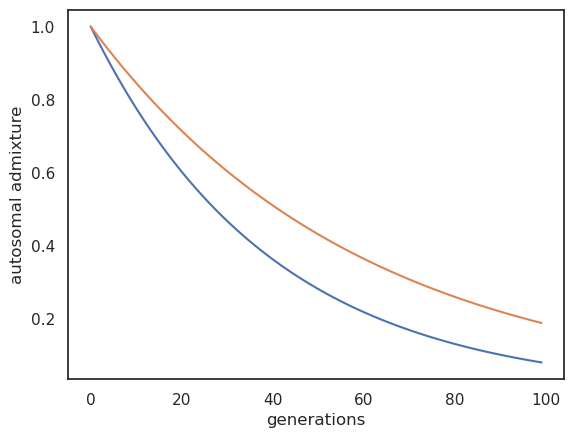

In [4]:
df_subset = calc_df.loc[calc_df.pop_number == 1]
sns.lineplot(data=df_subset, x="generations", y="autosomal admixture")
sns.lineplot(data=df_subset, x="generations", y="chrX admixture")

Calc based on:
https://academic.oup.com/genetics/article/201/1/263/5930073

In [5]:
for x in range(1, 100, 1):
    sf1 = 0.1
    sm2 = 0
    sm1 = x/100
    sf2 = 0.05
    hf = 1-sf1-sf2
    hm = 1-sm1-sm2
    fhx = (sf1+sm1+sf1*hm)/(sf1+sf2+sm1+sm2+hm*(sf1+sf2)) 
    fhm = (2*sf1+sm1*hf)/(sf1+sf2+sm1+sm2+hm*(sf1+sf2)) 
    print(fhx, fhm)

0.6774716369529983 0.6758508914100486
0.6876971608832807 0.6845425867507886
0.6973886328725039 0.6927803379416283
0.7065868263473053 0.7005988023952094
0.7153284671532847 0.708029197080292
0.7236467236467236 0.715099715099715
0.7315716272600834 0.7218358831710708
0.7391304347826085 0.7282608695652172
0.7463479415670651 0.7343957503320052
0.7532467532467533 0.7402597402597403
0.7598475222363406 0.7458703939008893
0.7661691542288557 0.7512437810945273
0.7722289890377588 0.7563946406820949
0.7780429594272076 0.7613365155131264
0.783625730994152 0.7660818713450291
0.7889908256880733 0.7706422018348623
0.7941507311586051 0.7750281214848144
0.7991169977924945 0.7792494481236202
0.8039003250270856 0.7833152762730228
0.8085106382978723 0.7872340425531913
0.812957157784744 0.7910135841170324
0.8172484599589322 0.7946611909650925
0.8213925327951563 0.7981836528758829
0.8253968253968254 0.8015873015873016
0.8292682926829267 0.8048780487804876
0.8330134357005757 0.8080614203454894
0.83663833805476

In [6]:
fhx = (sf1+sm1+sf1*hm)/(sf1+sf2+sm1+sm2+hm*(sf1+sf2)) 
fhx

0.9557599649583881

In [23]:
rfmix_path = "/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/eth_olive_focus/"
df_l = []
chroms = ["chr{}".format(x) for x in (range(1, 21))]+["all_chrX"]
for c in chroms:
    read_file = rfmix_path + "{}.windows.txt".format(c)
    df = pd.read_csv(read_file, sep="\t")
    df_l.append(df)
window_df_tanz = pd.concat(df_l)
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")
gog_olives = meta_data_samples.loc[meta_data_samples.Origin == "Gog Woreda, Gambella region, Ethiopia"].PGDP_ID
mean_window_df_eth = window_df_tanz.loc[window_df_tanz.individual.isin(gog_olives)].groupby(["chrom", "individual", "start", "end"]).mean().reset_index()

In [20]:
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")
gog_olives = meta_data_samples.loc[meta_data_samples.Origin == "Gog Woreda, Gambella region, Ethiopia"].PGDP_ID

In [18]:
meta_data_samples.Origin.unique()

array(['Mikumi, Tanzania', 'Aberdare, Kenya', 'Chunga, Zambia', 'captive',
       'Awash, Ethiopia', 'Serengeti, Tanzania', 'Arusha, Tanzania',
       'Ngorongoro, Tanzania', 'Ruaha, Tanzania', 'Gombe, Tanzania',
       'Udzungwa, Tanzania', 'Mahale, Tanzania', 'Katavi, Tanzania',
       'Selous, Tanzania', 'Lake Manyara, Tanzania',
       'Tarangire, Tanzania', 'Niokolo-Koba, Senegal',
       'Issa Valley, Tanzania', 'Dendro Park, Zambia', 'Filoha, Ethiopia',
       'Gog Woreda, Gambella region, Ethiopia'], dtype=object)

In [24]:
mean_window_df_eth.individual.unique()

array(['PD_0720', 'PD_0721', 'PD_0722', 'PD_0723', 'PD_0724', 'PD_0725',
       'PD_0726', 'PD_0727', 'PD_0728', 'PD_0729', 'PD_0730', 'PD_0731',
       'PD_0732', 'PD_0733', 'PD_0734', 'PD_0735', 'PD_0736', 'PD_0737',
       'PD_0738', 'PD_0739', 'PD_0740', 'PD_0741', 'PD_0742', 'PD_0743',
       'PD_0744'], dtype=object)

In [28]:
window_means_eth = mean_window_df_eth.groupby(['chrom', 'start', 'end']).north_sum.mean().to_frame().reset_index()
chrX_window_means_eth = window_means_eth.loc[window_means_eth.chrom == 'all_chrX']

plt.figure(figsize=(12, 4))
plt.fill_between(window_means_eth.pos, window_means_eth.north_sum, ec='none')

AttributeError: 'DataFrame' object has no attribute 'pos'

<Figure size 1200x400 with 0 Axes>